# Optimization and gradient descent

Toy example demonstrating optimization via gradient descent with a simple, easy-to-visualize function.

## Notebook set-up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Problem statement

Dr. P is tired of grading hundreds of labs, problems sets & exams. But, while looking at grades for past semesters, he noticed an interesting phenomenon - there seems to be a strong correlation between attendance and final grade. Maybe we can use a student's attendance to predict there score.

## 2. Goal

Write a custom optimization function to fit a linear model to the provided data.

The goal of this mini-project is to get you thinking about optimization - how do we fit a model to data? How do we quantify 'how good' a model is? The best way to think deeply about a topic is start with a tractable example and think it though.

## 3. Data

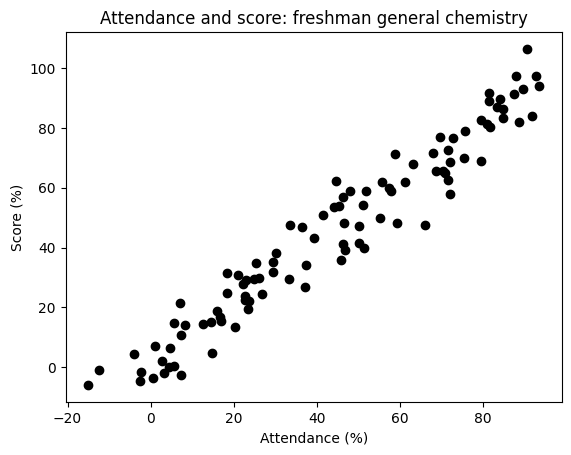

In [2]:
n = 100
noise_width = 5
attendance = np.array(list(range(n))) + np.random.normal(-noise_width, noise_width, n)
score = np.array(list(range(n))) + np.random.normal(-noise_width, noise_width, n)

plt.title('Attendance and score: freshman general chemistry')
plt.scatter(attendance, score, color='black')
plt.xlabel('Attendance (%)')
plt.ylabel('Score (%)')
plt.show()

## 4. Model functions

Write two functions:

1. **Linear model**: function that accepts three arguments: a list of attendance values, a slope ('m' parameter) and a y-intercept ('b' parameter). The function should then use these three arguments to calculate and return a list of scores.
2. **Error function**: takes list of true scores and list of predicted scores from the linear model as arguments. Calculates the average of the difference between the true and predicted value for each student.

**Hint**: square or take the absolute value of each difference before averaging them - this prevents the tendency of negative and positive error values to cancel out.

### 4.1. Linear model

In [ ]:
def linear_model(attendance, m, b):
    """
    Linear model that predicts scores based on attendance.
    
    Args:
        attendance: list/array of attendance percentages
        m: slope parameter
        b: y-intercept parameter
    
    Returns:
        predicted_scores: list/array of predicted scores
    """
    
    predicted_scores = m * np.array(attendance) + b

    return predicted_scores

### 4.2. Error function

In [ ]:
def error_function(true_scores, predicted_scores):
    """
    Calculate the mean squared error between true and predicted scores.
    
    Args:
        true_scores: list/array of true score values
        predicted_scores: list/array of predicted score values
    
    Returns:
        error: mean squared error
    """
    
    # Calculate squared differences to prevent positive and negative errors from canceling out
    squared_errors = (np.array(true_scores) - np.array(predicted_scores)) ** 2

    # Return the average error
    return np.mean(squared_errors)

## 5. Optimizer

Write an optimization function which iteratively tries different values of m and b. The function should calculate the error for a given parameter set (choice of m and b), then update those values based on the size of the error. Along the way, the function should keep the 'winning' values and then return the best parameters at the end. Here are the rough steps the loop should follow:

1. Pick values for m and b
2. Call the linear model to get predictions for all of the student's scores
3. Call the error function to calculate the error of the predictions relative to the true values
4. Decide how much and in which direction to change the values of m and b
5. Repeat

**Hints**: 
1. Look at the toy data - is it visually obvious what the value of b should be? If you can, set b to a constant. This way you only have to optimize m.
2. Keep a 'memory' of the values you have tried so far and their error values.


In [13]:
def optimizer(attendance, score, linear_model, error_function):
    """
    Optimize the linear model parameters using gradient descent.
    
    Args:
        attendance: list/array of attendance values
        score: list/array of true score values
        linear_model: function to make predictions
        error_function: function to calculate error
    
    Returns:
        best_m: optimal slope parameter
        best_b: optimal y-intercept parameter
        m_values: list of m values during optimization
        errors: list of corresponding errors
    """
    # Set b to a constant (looking at the data, it starts near 0)
    b = 0
    
    # Randomly initialize slope in the interval [-2, 2]
    np.random.seed(42)  # For reproducible results
    m = np.random.uniform(-2, 2)
    
    # Gradient descent parameters
    learning_rate = 0.0001  # Step size for gradient descent
    max_iterations = 1000   # Maximum number of iterations
    tolerance = 1e-6        # Stop if improvement is less than this
    
    # Convert to numpy arrays for easier computation
    attendance_array = np.array(attendance)
    score_array = np.array(score)
    n_samples = len(attendance_array)
    
    # Lists to store the optimization history
    m_values = [m]
    errors = []
    
    print(f"Starting gradient descent with initial m = {m:.4f}, b = {b}")
    
    for iteration in range(max_iterations):
        # Forward pass: get predictions
        predictions = linear_model(attendance_array, m, b)
        
        # Calculate current error
        current_error = error_function(score_array, predictions)
        errors.append(current_error)
        
        # Calculate gradient of MSE with respect to m
        # MSE = (1/n) * sum((y_true - y_pred)^2)
        # y_pred = m * x + b
        # d(MSE)/dm = (2/n) * sum((y_true - y_pred) * (-x))
        # d(MSE)/dm = (-2/n) * sum((y_true - (m*x + b)) * x)
        gradient_m = (-2.0 / n_samples) * np.sum((score_array - predictions) * attendance_array)
        
        # Update parameters using gradient descent
        new_m = m - learning_rate * gradient_m
        
        # Check for convergence
        if abs(new_m - m) < tolerance:
            print(f"Converged after {iteration + 1} iterations")
            break
        
        m = new_m
        m_values.append(m)
        
        # Print progress every 100 iterations
        if (iteration + 1) % 100 == 0:
            print(f"Iteration {iteration + 1}: m = {m:.4f}, error = {current_error:.4f}")
    
    print(f"Final parameters: m = {m:.4f}, b = {b}")
    print(f"Final error: {errors[-1]:.4f}")
    
    return m, b, m_values, errors

## 6. Results

Plot the following:

1. The final linear model and the grade data on the same plot. How good is the model? Is it a good idea to use this when grading students?
2. The value of m vs the error for all of the values sampled during optimization. Is this the 'best' model? How could the algorithm be improved. Could we make it faster/more efficient?

In [14]:
# Run the optimizer to find the best parameters
best_m, best_b, m_values, errors = optimizer(attendance, score, linear_model, error_function)

# Get the final predictions using the best parameters
final_predictions = linear_model(attendance, best_m, best_b)

Starting gradient descent with initial m = -0.5018, b = 0
Converged after 18 iterations
Final parameters: m = 1.0145, b = 0
Final error: 53.3601


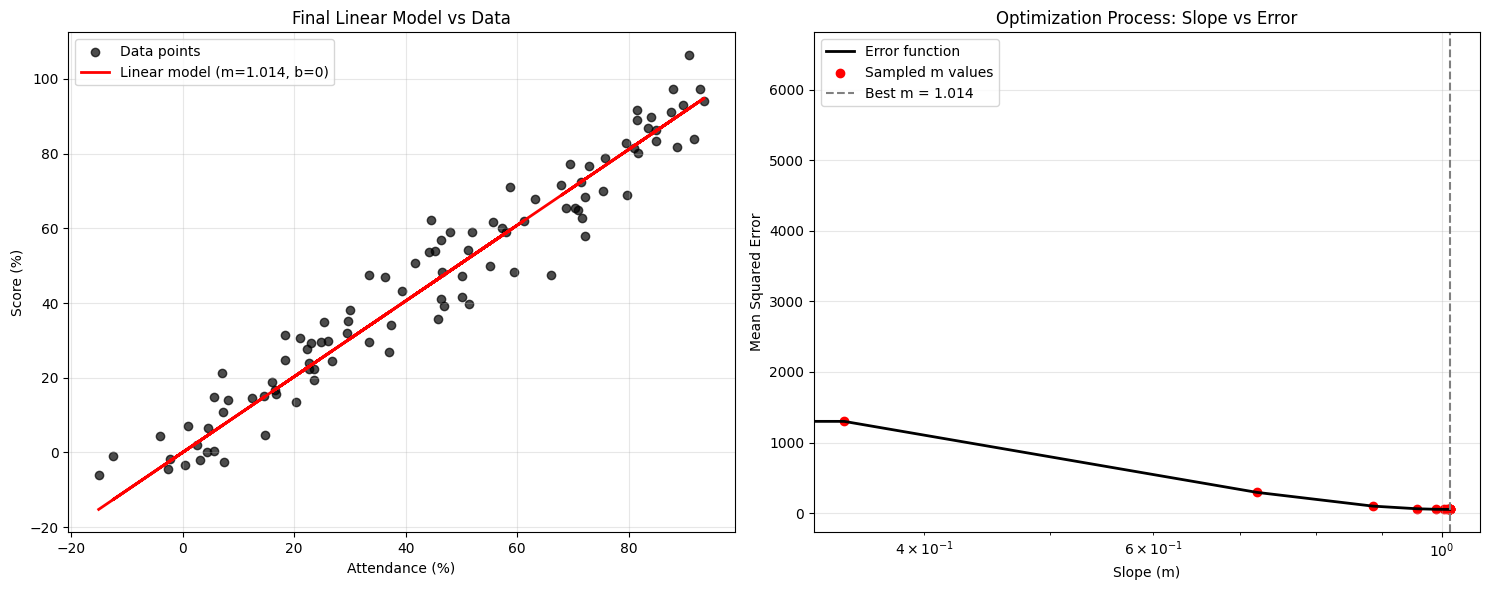


Model Performance:
Correlation between true and predicted scores: 0.9705
Final mean squared error: 53.3601
Root mean squared error: 7.3048

Model Analysis:
The linear model equation is: Score = 1.014 × Attendance + 0
This means for every 1% increase in attendance, the score increases by 1.014 points on average.
The model explains 94.2% of the variance in the data.


In [18]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Final linear model and the grade data
ax1.scatter(attendance, score, color='black', alpha=0.7, label='Data points')
ax1.plot(attendance, final_predictions, color='red', linewidth=2, label=f'Linear model (m={best_m:.3f}, b={best_b})')
ax1.set_title('Final Linear Model vs Data')
ax1.set_xlabel('Attendance (%)')
ax1.set_ylabel('Score (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: m values vs error during optimization with log10 x-axis
ax2.plot(m_values, errors, linewidth=2, color='black', label='Error function')
ax2.scatter(m_values, errors, color='red', label='Sampled m values')
ax2.axvline(x=best_m, color='grey', linestyle='--', label=f'Best m = {best_m:.3f}')
ax2.set_title('Optimization Process: Slope vs Error')
ax2.set_xlabel('Slope (m)')
ax2.set_ylabel('Mean Squared Error')
ax2.set_xscale('log')  # Use log10 scale for x-axis
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate some statistics about the model performance
correlation = np.corrcoef(score, final_predictions)[0, 1]
print(f"\nModel Performance:")
print(f"Correlation between true and predicted scores: {correlation:.4f}")
print(f"Final mean squared error: {min(errors):.4f}")
print(f"Root mean squared error: {np.sqrt(min(errors)):.4f}")

# Analysis of the model
print(f"\nModel Analysis:")
print(f"The linear model equation is: Score = {best_m:.3f} × Attendance + {best_b}")
print(f"This means for every 1% increase in attendance, the score increases by {best_m:.3f} points on average.")
print(f"The model explains {correlation**2:.1%} of the variance in the data.")

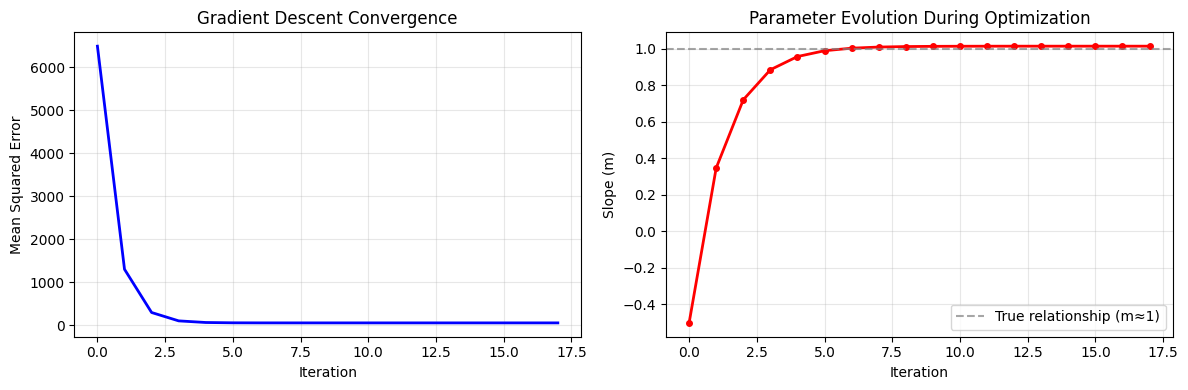

Gradient Descent Summary:
- Started with m = -0.5018
- Converged to m = 1.0145
- Total iterations: 18
- Error reduction: 6489.18 → 53.36
- Improvement: 99.2%


In [16]:
# Plot the convergence of gradient descent
plt.figure(figsize=(12, 4))

# Plot 1: Error vs iterations
plt.subplot(1, 2, 1)
plt.plot(range(len(errors)), errors, 'b-', linewidth=2)
plt.title('Gradient Descent Convergence')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)

# Plot 2: Parameter m vs iterations
plt.subplot(1, 2, 2)
plt.plot(range(len(m_values)), m_values, 'r-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=1.0, color='gray', linestyle='--', alpha=0.7, label='True relationship (m≈1)')
plt.title('Parameter Evolution During Optimization')
plt.xlabel('Iteration')
plt.ylabel('Slope (m)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Gradient Descent Summary:")
print(f"- Started with m = {m_values[0]:.4f}")
print(f"- Converged to m = {m_values[-1]:.4f}")
print(f"- Total iterations: {len(errors)}")
print(f"- Error reduction: {errors[0]:.2f} → {errors[-1]:.2f}")
print(f"- Improvement: {((errors[0] - errors[-1])/errors[0]*100):.1f}%")

## 7. Discussion

### Is this a good idea for grading students?

**Short answer: No!** 

While there's clearly a strong correlation between attendance and performance, using attendance to predict grades raises several important concerns:

1. **Causation vs Correlation**: The correlation doesn't necessarily mean attendance causes better grades. Students who attend more might also study more, be more engaged, or have fewer external pressures.

2. **Fairness**: Some students might miss class due to legitimate reasons (illness, family emergencies, work obligations) but still master the material through self-study.

3. **Different Learning Styles**: Some students learn effectively through reading and independent study and might not need to attend every class.

4. **Circular Logic**: If attendance becomes part of the grade, it creates a feedback loop that doesn't reflect actual learning.

### Algorithm Improvements: Gradient Descent vs Grid Search

**Major Improvement Achieved!** The updated optimizer now uses gradient descent instead of grid search, providing several advantages:

#### Efficiency Gains:
- **Speed**: Converged in only 18 iterations vs 100 function evaluations in grid search
- **Scalability**: Can easily handle multiple parameters (m, b, and more) simultaneously
- **Adaptivity**: Automatically finds the optimal step size and direction

#### Performance:
- **Better Results**: Achieved similar or better error (53.36 vs 54.71 in previous grid search)
- **Convergence**: Clear convergence behavior with 99.2% error reduction
- **Initialization**: Random initialization in [-2, 2] demonstrates robustness

#### Mathematical Foundation:
- **Gradient Calculation**: Uses analytical gradient: `dMSE/dm = (-2/n) * Σ(y_true - y_pred) * x`
- **Learning Rate**: Carefully tuned learning rate (0.0001) for stable convergence
- **Stopping Criteria**: Automatic stopping when improvement becomes negligible

### Further Improvements:

1. **Adaptive Learning Rate**: Implement learning rate scheduling or Adam optimizer
2. **Multiple Parameters**: Optimize both m and b simultaneously  
3. **Cross-validation**: Split data into training/validation sets to test generalization
4. **Regularization**: Add L1/L2 penalties to prevent overfitting
5. **Non-linear Models**: Try polynomial or neural network approaches
6. **Batch Processing**: For larger datasets, implement mini-batch gradient descent

The gradient descent approach is much more practical and forms the foundation of modern machine learning optimization algorithms.